<a href="https://colab.research.google.com/github/Bhavik2209/olympics_analysis/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/athlete_events.csv")
df_rgn=pd.read_csv("/content/noc_regions.csv")

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:

df=df[df['Season']=='Summer']

In [ ]:
df=df.merge(df_rgn, on='NOC', how='left')

In [ ]:
df.shape

(222552, 17)

here i made three colums for medals (g,s,b).


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
Bronze         0
Gold           0
Silver         0
dtype: int64

In [ ]:
df.duplicated().sum()

1385

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()

<ipython-input-51-06c410a45948>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()


,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


there is a problem, so in team sports like hockey each team member gets the medal but it's consider as a one medal for paricular country, so in this data each member's medal is counted so no of medals in increased therefore we have to remove the rows whose these values (noc,year,team,games,sport,city,event,medal) are same.

In [ ]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [ ]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()

<ipython-input-53-6107b55a74ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()


In [ ]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [ ]:
medal_tally['Total']= medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [ ]:
medal_tally

,NOC,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [ ]:
years = df['Year'].unique().tolist()

In [ ]:
years.sort()

In [ ]:
years.insert(0,'Overall')

In [ ]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [ ]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()

In [ ]:
country.insert(0,'Overall')

In [ ]:
def find_medal_tally(df,year,country):
  medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
  flag=0
  if year=='Overall' and country=='Overall':
    temp_df=medal_df
  if year=='Overall' and country!='Overall':
    flag=1
    temp_df = medal_df[medal_df['region']==country]
  if year!='Overall' and country=='Overall':
    temp_df = medal_df[medal_df['Year']==year]
  if year!='Overall' and country!='Overall':
    temp_df = medal_df[(medal_df['Year']==year) & (medal_df['region']==country)]
  if flag ==  1:
    x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
  else:
    x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
  x['Total']= x['Gold'] + x['Silver'] + x['Bronze']

  print(x)

In [ ]:
find_medal_tally(df,year=1900,country='India')

  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


<ipython-input-63-3ac53ad5f795>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()


In [ ]:
df['Year'].unique().shape[0]
df['City'].unique().shape[0]
df['Sport'].unique().shape[0]
df['Event'].unique().shape[0]
df['Name'].unique().shape[0]
df['region'].unique().shape[0]

206

In [ ]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [ ]:
nations_over_time.rename(columns={'index': 'Edition','Year':'No Of Countries'},inplace=True)

In [ ]:
nations_over_time

,Edition,No Of Countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


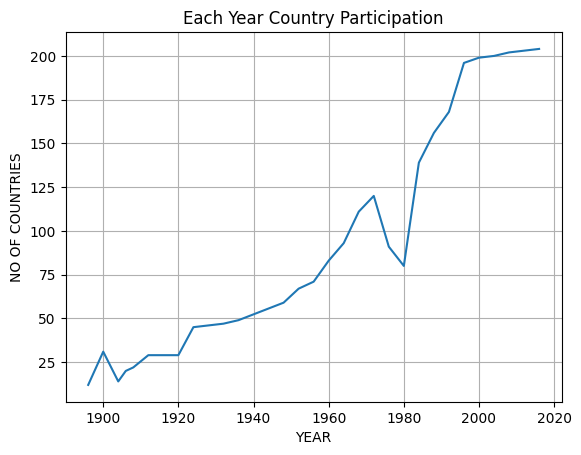

In [ ]:
plt.plot(nations_over_time['Edition'],nations_over_time['No Of Countries'])
plt.grid()
plt.title("Each Year Country Participation")
plt.xlabel("YEAR")
plt.ylabel("NO OF COUNTRIES")
plt.show()

In [ ]:
events_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

In [ ]:
events_over_time.rename(columns={'index': 'Edition','Year':'No Of Events'},inplace=True)

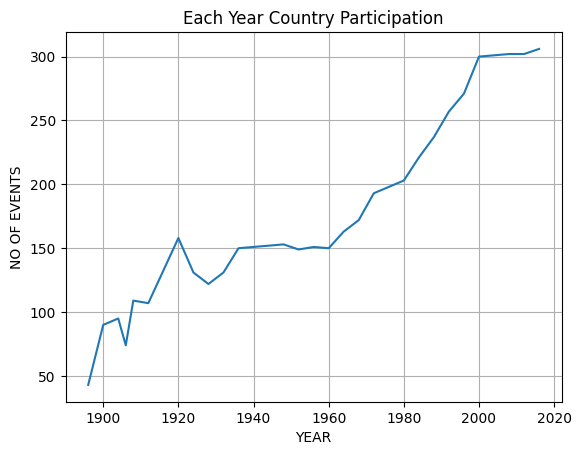

In [ ]:
plt.plot(events_over_time['Edition'],events_over_time['No Of Events'])
plt.grid()
plt.title("Each Year Country Participation")
plt.xlabel("YEAR")
plt.ylabel("NO OF EVENTS")
plt.show()

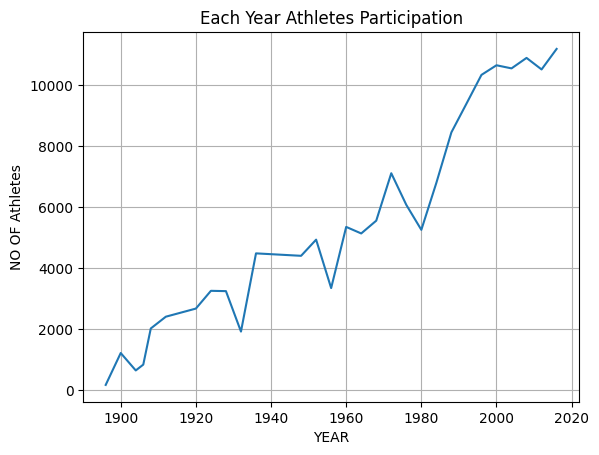

In [ ]:
athletes_over_time = df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')
athletes_over_time.rename(columns={'index': 'Edition','Year':'No Of Athletes'},inplace=True)
plt.plot(athletes_over_time['Edition'],athletes_over_time['No Of Athletes'])
plt.grid()
plt.title("Each Year Athletes Participation")
plt.xlabel("YEAR")
plt.ylabel("NO OF Athletes")
plt.show()

In [ ]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

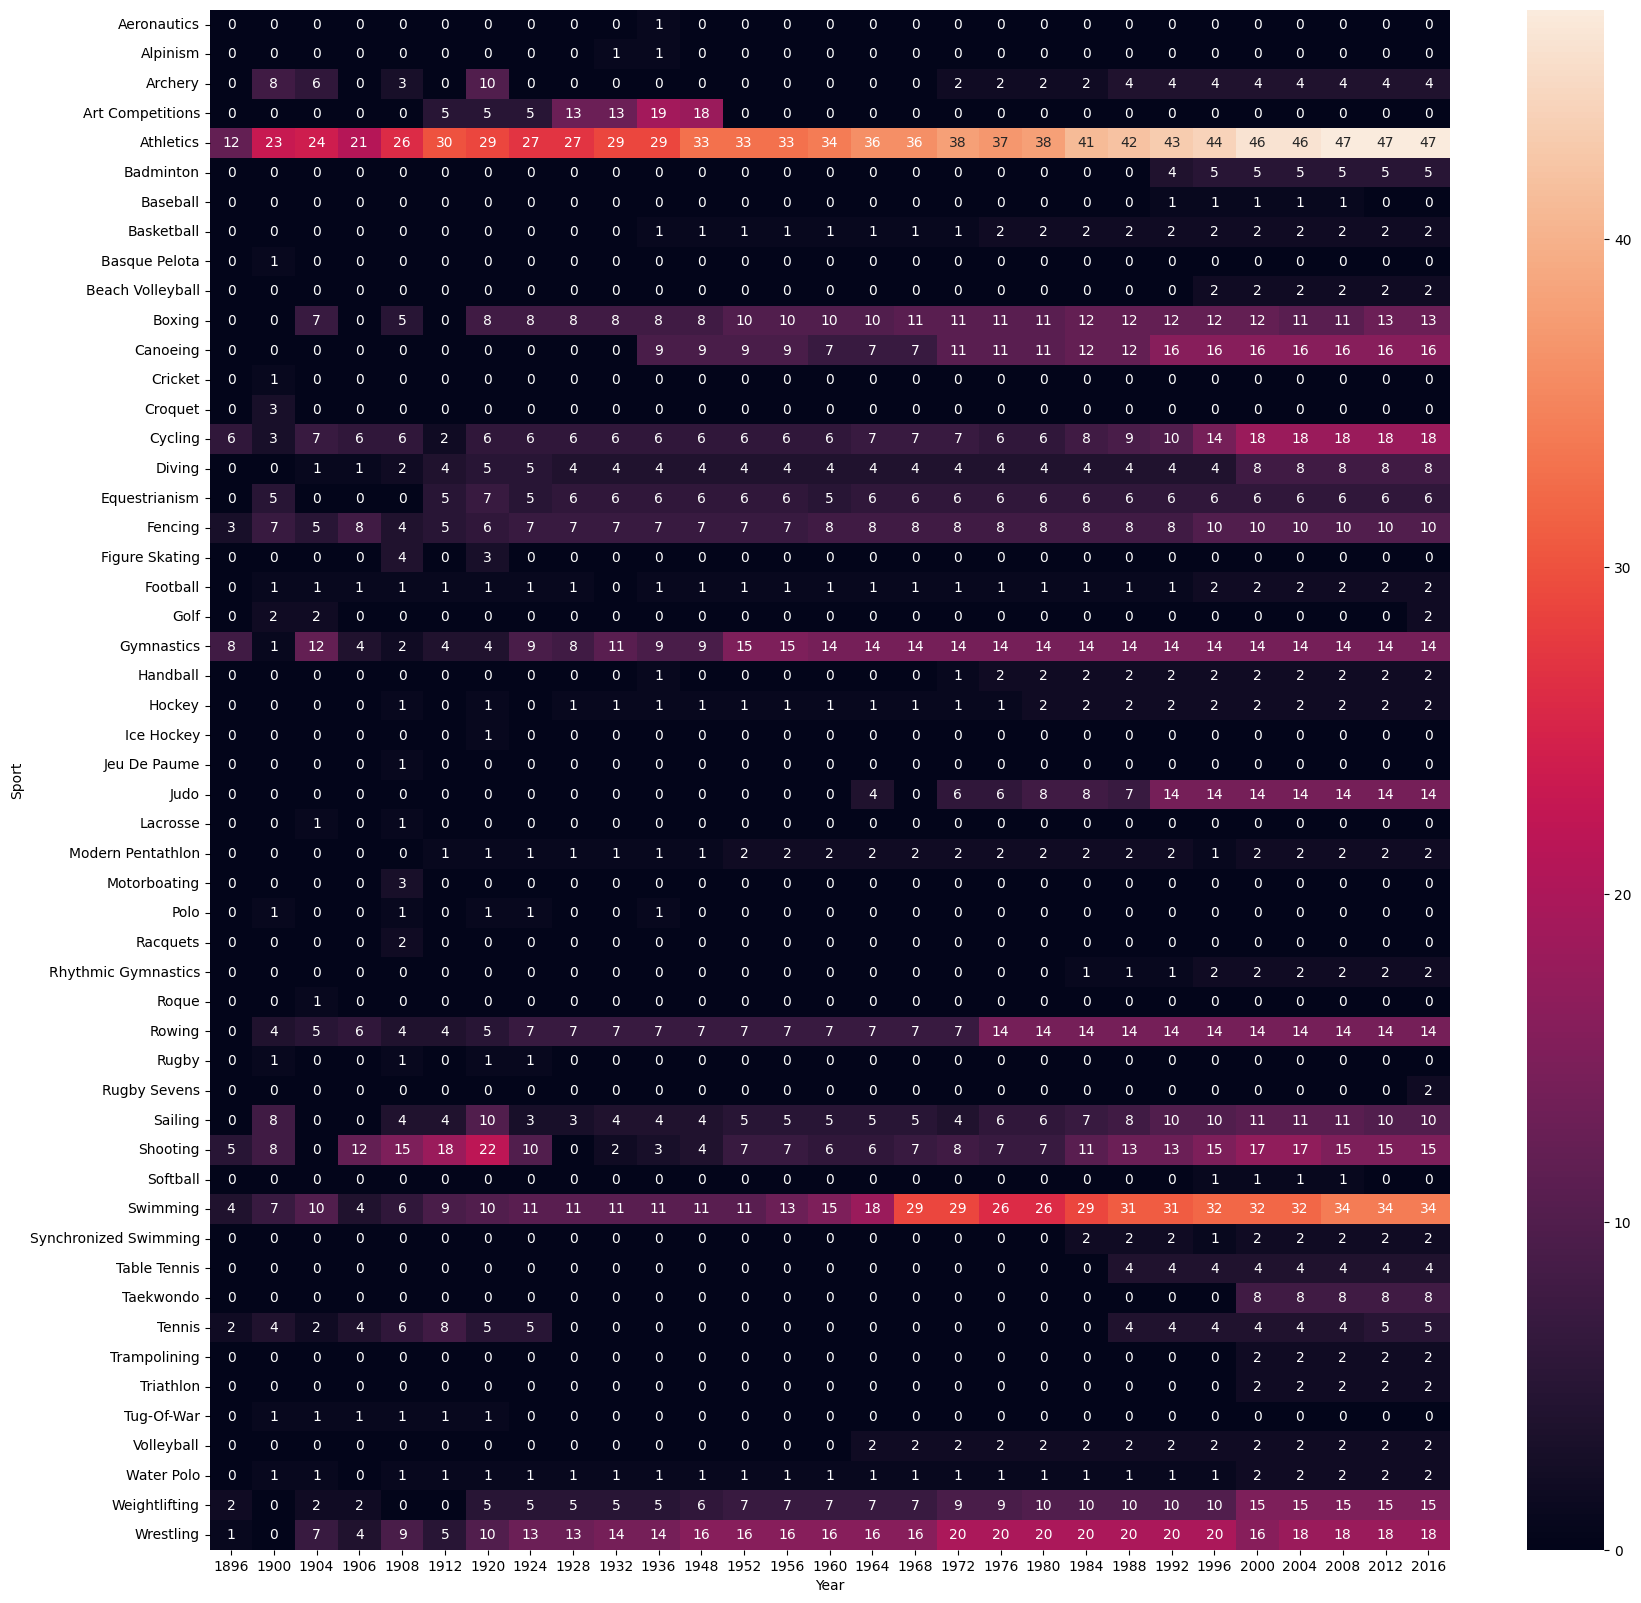

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)


now we will make a analysis of most successful athletes in all the sports for that we need to remove all that rows which contains 0 medals.


In [ ]:
def mostSuccessful(df,sport):
  temp_df=df.dropna(subset=['Medal'])

  if(sport!='Overall'):
    temp_df=temp_df[temp_df['Sport']==sport]
  x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
  x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
  return x

In [ ]:
mostSuccessful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


**counrty wise analysis**
1.  countrywise medal tally
2.  what countries are good in heatmap
3.  Most successful athletes (top 10)





In [ ]:
temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

<ipython-input-78-a3dafb978329>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)


In [ ]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

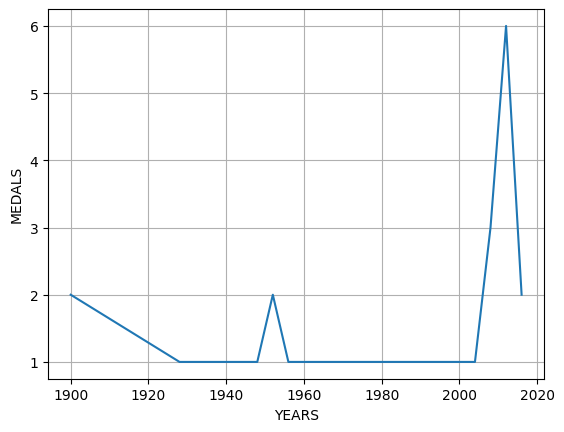

In [ ]:
plt.plot(final_df['Year'],final_df['Medal'])
plt.grid()
plt.ylabel("MEDALS")
plt.xlabel("YEARS")
plt.show()

if  user_menu == 'Country-Wise Analysis':

    st.sidebar.title("Counrty-wise Analysis")

    country_list = df['region'].dropna().unique().tolist()
    country_list.sort()

    selected_country = st.sidebar.selectbox('Select a Country',country_list)

    country_df = helper.year_wise_medals(df,selected_country)
    fig = plt.figure(figsize=(7, 7))
    fig.set_figwidth(4)
    fig.set_figheight(2)
    plt.plot(country_df['Year'], country_df['Medal'])
    plt.grid()
    plt.xlabel("YEARS")
    plt.ylabel("MEDALS")
    plt.show()
    st.title(selected_country + " Medal Tally Over the Years")
    st.set_option('deprecation.showPyplotGlobalUse', False)
    #  to remove the warning for not passing the argument in st.pyplot()
    st.pyplot(fig)

<Axes: xlabel='Year', ylabel='Sport'>

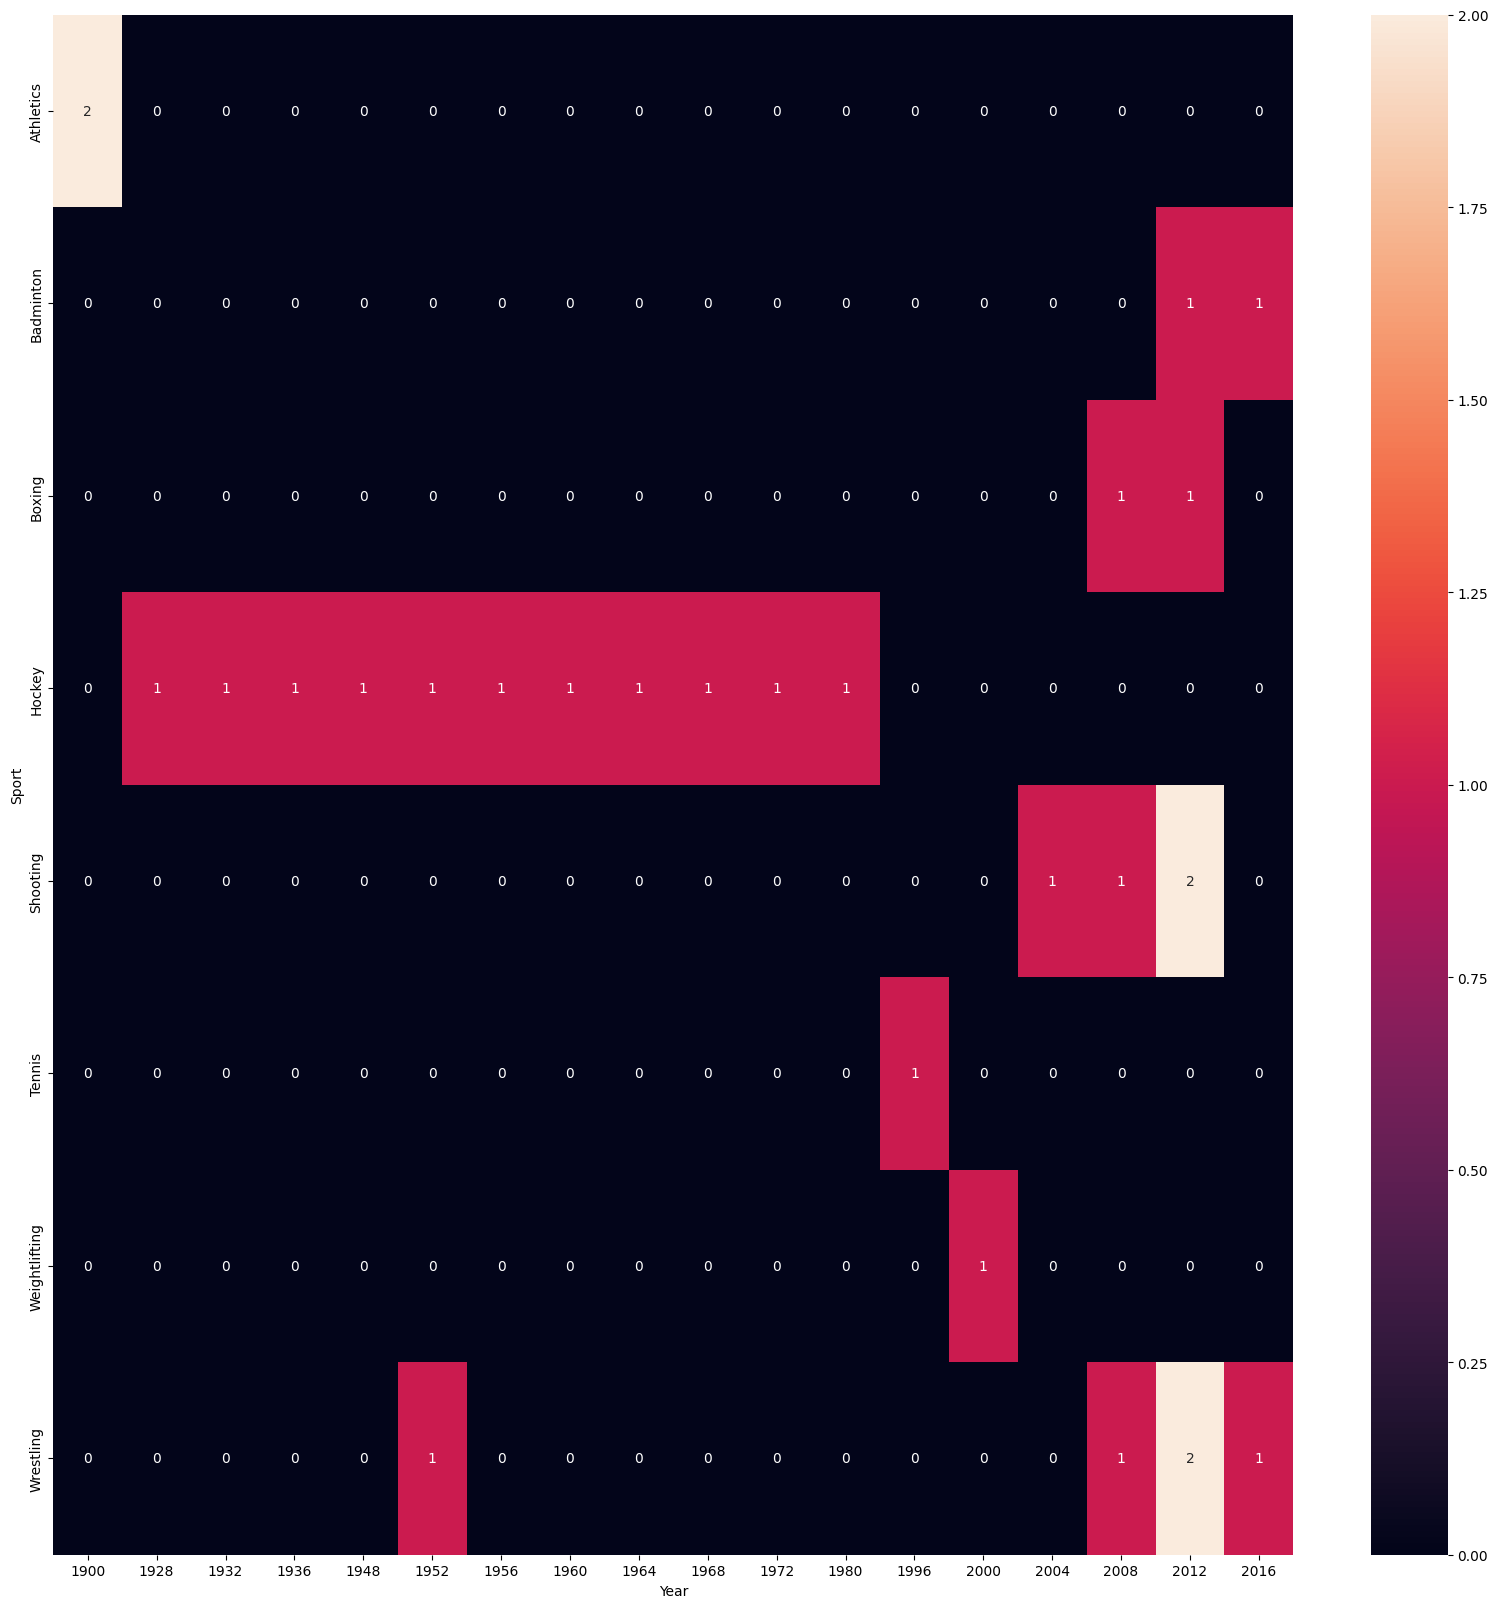

In [ ]:
new_df = temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns="Year",values='Medal',aggfunc='count').fillna(0),annot=True)

In [ ]:
def mostSuccessful(df,country):
  temp_df=df.dropna(subset=['Medal'])

  temp_df=temp_df[temp_df['region'] == country]
  x= temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
  x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
  return x

In [ ]:
mostSuccessful(df,'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics
